In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [4]:
"""
Load styles.csv into memory as a pandas dataframe and save it as a variable df. Using the read_csv() method 
like usual will already cause problems because there seem to be some lines within the csv file where there 
is a comma within one of the entries. This will create a row that pandas is reading to have more columns than 
it is supposed to because commas are the default delimiter. One way around this is to have pandas not read 
the “bad” rows by specifying error_bad_lines=False.
"""

df = pd.read_csv('styles.csv', error_bad_lines=False)
df.head()

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
"""
Next, drop all the columns that are not either the “id” or “masterCategory” column. You can do this either by 
dropping all the other columns or reinitializing df as the subset of df with only those 2 columns.
"""
df = df[['id','masterCategory']]

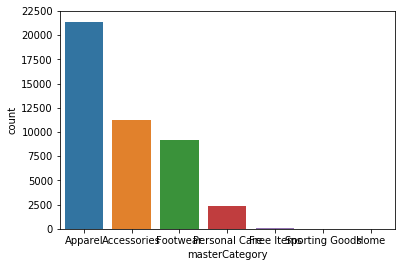

In [7]:
"""
Once you have done this, create a plot that shows the number of items that belong to each distinct category in 
the masterCategory column. The easiest way to do this is probably to import seaborn and use the countplot() method. 
This will give you an idea of the fraction of items that go to each category. Some things to think about: Which 
category has the most items? What fraction of items belong to that category? Knowing this, what would a suitable 
benchmark be for the accuracy of our image classification model?.
"""

import seaborn as sns
sns.countplot(df['masterCategory'])

(80, 60, 3)
(14400,)
True


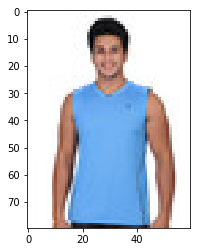

In [12]:
"""
Next we are going to open one of the images in the images folder and convert it to a form that can be used for 
our model. Pick one of the images in the folder and identify the path to that image. matplotlib.pyplot has a 
method called imread() that can read in jpg files, and convert them to numpy arrays. Save one of the images as 
an array and then print out the shape of the array. Unless you got very unlucky (in which case try another 
image), it should have a shape of (80,60,3). This means that the image is 80 pixels tall, 60 pixels wide, and 
the third dimension shows the red, green, and blue intensities at every pixel (the color of every pixel is 
some combination of red, green, and blue). For this array to be in a form that we can treat as a row in a dataset, 
it needs to be flattened with the flatten() method. This should turn it into an array of shape (14400,). Print 
out the shape of the flattened array. If you ever want to convert it back to its original shape, you can use 
the reshape() method.
"""
a = plt.imread('images/1796.jpg')
print(a.shape)
print(a.flatten().shape)
print((a.flatten().reshape((80,60,3)) == a).all())
plt.imshow(a)

In [13]:
"""
Create 2 empty lists called arrays and names. Then, by iterating over the id column in df, add the id to the names 
list, and the flattened numpy array of the corresponding image to the arrays list one by one. You will notice a few 
issues doing this however. There are a handful of ids in the id column that don’t have a corresponding image in the 
images folder. There are also a few images that don’t have a shape of (80, 60, 3), either because the picture has 
a different height/width, or it is a grayscale image, so it has a shape of (80, 60) instead. Find a way to make 
sure you are only including images that are in the images folder, and have the correct shape of (80, 60, 3) when 
appending to the lists. If you like, find a way to take note of the number of entries that don’t satisfy these 
conditions, and justify why it is okay to leave out these entries. You will want to use try/except and if statements.
"""

arrays = []
names = []
for i in df['id']:
    errors = 0
    try:
        arr = plt.imread('images/{}.jpg'.format(str(i))).flatten()
        if len(arr) == 14400:
            arrays.append(arr)
            names.append(i)
    except FileNotFoundError:
        print('{} not found'.format(str(i)))
        errors += 1
        if errors >= 100:
            break

39403 not found
39410 not found
39401 not found
39425 not found
12347 not found


In [20]:
"""
Once these 2 lists have been created, the variable will be a list of numpy arrays all having a shape of (14400,). 
Find a way to convert this into a 2 dimensional numpy array with the number of rows being the original number of 
rows in the variable arrays and the number of columns being 14400. np.concatenate and reshape() may be helpful 
here. Then convert this into another pandas dataframe and save this dataframe to a variable called imagedf. Add 
an ‘id’ column to imagedf which is the names list you created earlier. As long as they are the same length, you 
shouldn’t experience problems with this step.
"""

length = len(arrays[0])
arrlist = []
for x in arrays:
    arrlist.append(x.reshape(1,length))
imagearrays = np.concatenate(arrlist)
namesSeries = pd.Series(names)
imagedf = pd.DataFrame(imagearrays)
imagedf['id'] = namesSeries

imagedf.head()

,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,id
0,255,255,255,255,255,255,255,255,255,255,...,254,255,255,254,255,253,255,255,251,15970
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,39386
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,21379
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,53759
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1855


In [21]:
"""
You now have df, which should have the columns id and masterCategory, and imagedf which should have the columns 
id, and all of the columns representing the image arrays. Merge these dataframes together with an inner join, 
and join on the id column. Once you have done this, drop the id column from this new dataframe. Save this new 
dataframe as the variable DF (or overwrite imagedf if you’re concerned with memory). If all went well, you should 
have a dataframe that has 43965 rows and 14401 columns and should look something like this.
"""

imagedf = imagedf.merge(df, on='id', how='inner')
imagedf = imagedf.drop(['id'], axis=1)

In [22]:
"""
Using DF, create a training set and testing set with the train_test_split() method, using the masterCategory column 
as y. Use whatever test size you wish. Since there is quite a lot of rows, we can afford to use a relatively small 
test size, like 0.2.
"""

X = imagedf.drop('masterCategory', axis=1)
y = imagedf['masterCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
"""
Once you have created X_train, X_test, y_train, and y_test, there is one last preprocessing 
step we need to take before modeling. Because of the number of rows and columns in this dataset, it is not practical 
to fit a machine learning model directly to it, even if you’re using logistic regression or some other simple model. 
It will take much too long to fit. Instead, we are going to reduce the dimensionality of X_train and X_test by using 
a technique called PCA. Within any high dimensional dataset, there are directions that the data has the highest 
variance along. PCA attempts to find these directions, and reduce all the data points to how far along these 
specific directions they lie. Using this technique, we can lower the dimensionality of our dataset from 14400 to as 
low as we want. See https://scikit- learn.org/stable/modules/generated/sklearn.decomposition.PCA.html for how to use 
the PCA module. The principal components will be ordered by the variance in the data along that direction, which in theory should 
retain the most information about each point. 

Initialize a PCA instance with n_components = 10 (you can change this 
in the future if you like but be aware that the model will take longer to fit the more components you use). Fit 
it to X_train, and then transform it on X_train, and X_test, creating the new variables P_train and P_test.
"""

pca = PCA(n_components=10)
pca.fit(X_train)
P_train, P_test = pca.transform(X_train), pca.transform(X_test)
print(pca.explained_variance_ratio_)

[0.24466055 0.14748487 0.06401031 0.04844352 0.03909954 0.02110587
 0.01933746 0.01650156 0.01562171 0.01423463]


In [24]:
"""
Now that we have data that has a more reasonable amount of columns, initialize a sklearn classification model, fit 
it to the training data, and record the accuracy score on the testing data. What score did you get, and how does 
this compare to the benchmark score you set earlier? Once you have this, try to optimize this process by using a 
different amount of PCA components, using different models and tuning the hyperparameters for the models you use. 
What was the highest accuracy score you managed to get on the test set?
"""

model = LogisticRegression()
model.fit(P_train, y_train)
print(model.score(P_test, y_test))

0.8911634254520642


/Users/aselzler3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


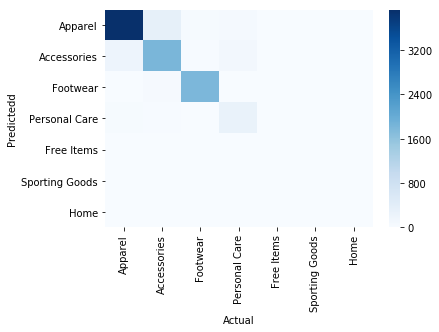

In [26]:
"""
Having a model that can accurately predict the category of the images is great, but from a clients perspective, 
it is very important to create visualizations that are easy to look at/follow that convey important information, 
like how well the model is performing on each category and what it is actually doing to create these predictions.

First create a confusion matrix of the prediction values for P_test vs the actual values. See 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html. This is just an array 
that represents the confusion matrix. You will have to do some research in order to create a nice looking plot of 
this confusion matrix. I would recommend using the seaborn heatmap() method. If you use this, you can change the 
color mapping with the cmap argument, to ‘Blues’ and you can add x and y labels with plt.xlabel and plt.ylabel 
(despite using seaborn to create the figure). This way it is possible to distinguish which axis is the predicted 
values vs the actual values.

"""

prediction = model.predict(P_test)
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
categories = df['masterCategory'].unique()
cm = confusion_matrix(prediction, y_test, labels=categories)
dfcm = pd.DataFrame(cm, index = categories, columns = categories)
sns.heatmap(dfcm, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predictedd')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


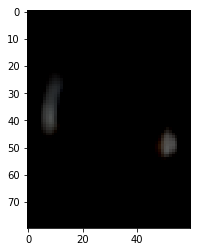

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


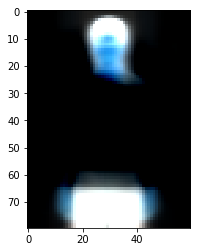

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


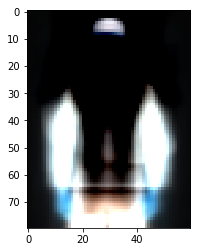

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


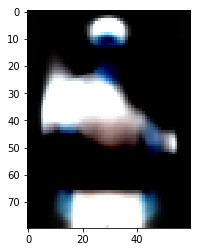

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


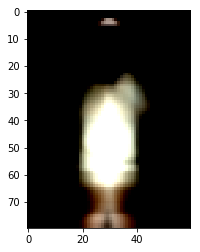

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


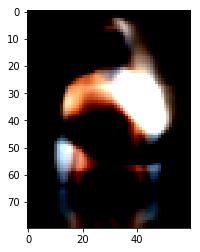

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


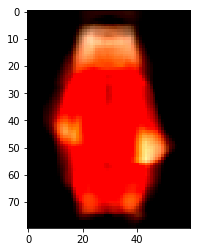

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


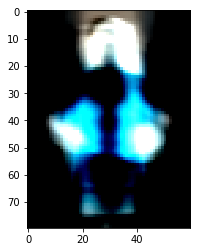

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


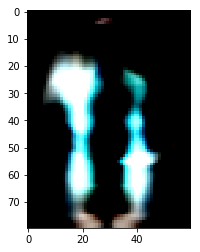

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


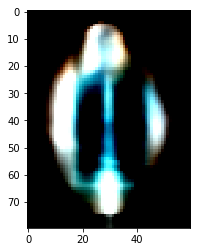

In [28]:
"""
Next, we reduced the original data down to their first 10 or so PCA components, but what do these components 
actually represent? The PCA instance you initialized to reduce the dataset has a components_ attribute. This 
will return an array of arrays each with shape (14400,) that represent vectors pointed in the direction of 
highest variance within the original dataset. The number of arrays should be the value you specified for 
n_components. Convert these vectors back to their original shape of (80, 60, 3), and plot the corresponding 
images of these principal component vectors using the matplotlib imshow() method. You may have to multiply 
these vectors by a scalar (eg 100) to get the image to show anything. The higher number you use, the brighter 
your images will be. You should see pictures that look like something out of a strange painting or science 
fiction film.
"""

for i in range(pca.n_components):
    plt.imshow(pca.components_[i].reshape((80,60,3)) * 100)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


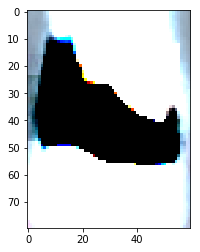

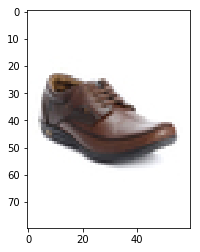

In [30]:
"""
One way to think of this if you are familiar with linear algebra is that these images are basis vectors (or basis 
images) that live in a subspace of the original vector space for the images. To an approximation every image in our 
images folder can be expressed as a linear combination of these basis images. The more PCA components you use, the 
closer this approximation of the images will get to the real thing. By using PCA, we are reducing the dimensionality 
of these images to the amount of each PCA component is needed to reproduce these images, cut off by the number of 
components we decided to use.

To make this more believable, you can compare any one of the actual images to the approximation of that image using 
the first PCA components. Load one of the images to an array using imread(). Then reduce the dimensionality of this 
array by flattening it, and then applying the transform() method on this array from the PCA instance you initialized 
earlier to fit to the training set. You may need to use reshape() to change the shape of this array to a 2 
dimensional array with one row and 14400 columns (this is not quite the same as a 1D array).

The approximation to the original flattened array is (sum over i) reducedarr[i] * components[i]
where reducedarr is the PCA transformed flattened array, and components is the array of PCA component vectors 
(pca.components_). Once you have this calculated out, reshape it back to (80, 60, 3) and plot an image of this array 
using imshow(). Make a plot of the original array which should show the original image right underneath this image 
for comparison. The first image should look vaguely similar to the original image. The more pca components you use, 
the more similar this picture will become to the original image.
"""

arr = plt.imread('images/{}.jpg'.format(str(17756)))
flattened = arr.flatten()
approx = np.dot(pca.transform(flattened.reshape(1,-1)), pca.components_)
plt.imshow(approx.reshape((80,60,3)))
plt.show()
plt.imshow(arr)
plt.show()

In [31]:
"""
Once you have completed these steps, you are done with the assignment, though if you feel compelled to create more 
visualizations/results from your analysis feel free to include them in the notebook. Push the jupyter notebook to 
github, but do not attempt to push the dataset to github. There is a limit on how much data can be pushed to a github 
repository.

What we have done here only scratches the surface when it comes to image classification techniques. A more advanced 
approach is to create a neural network that detects a “target” image from a larger image, and classifies that image 
by certain features of the image, like the angle and locations of all the edges, etc. See 
https://towardsdatascience.com/wtf-is-image- classification-8e78a8235acb for an introduction to this topic.
"""

'\nOnce you have completed these steps, you are done with the assignment, though if you feel compelled to create more \nvisualizations/results from your analysis feel free to include them in the notebook. Push the jupyter notebook to \ngithub, but do not attempt to push the dataset to github. There is a limit on how much data can be pushed to a github \nrepository.\n\nWhat we have done here only scratches the surface when it comes to image classification techniques. A more advanced \napproach is to create a neural network that detects a “target” image from a larger image, and classifies that image \nby certain features of the image, like the angle and locations of all the edges, etc. See \nhttps://towardsdatascience.com/wtf-is-image- classification-8e78a8235acb for an introduction to this topic.\n'